In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

## Cohort analysis

In [49]:
pd.set_option("display.precision", 2)

In [50]:
users_df = pd.read_csv('printbox_joined_dates.csv')
operations_df = pd.read_csv('printbox_print_operation.csv')

In [51]:
users_df = users_df.rename({'Time': 'reg_date'}, axis=1)
users_df.head()

,reg_date,id
0,2017-11-28 00:19:40,2
1,2017-11-28 00:24:39,3
2,2017-11-28 00:30:21,4
3,2017-11-28 00:32:02,5
4,2017-11-28 00:36:22,6


In [52]:
users_df = users_df.set_index('id')
users_df.head()

,reg_date
id,
2,2017-11-28 00:19:40
3,2017-11-28 00:24:39
4,2017-11-28 00:30:21
5,2017-11-28 00:32:02
6,2017-11-28 00:36:22


In [53]:
operations_df = operations_df.drop('time', axis=1)
operations_df.head()

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,cups_id,operation_document_id,operation_owner_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price
0,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,214.0,6,6,1,2,1,-1,0
1,2,2017-11-29T14:19:21.306698Z,2017-11-29T14:20:20.908574Z,0,190,1,1,102,215.0,5,1,1,2,1,-1,0
2,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,216.0,14,15,1,2,1,-1,0
3,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,217.0,18,15,1,2,1,-1,0
4,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,218.0,20,15,1,2,4,-1,0


In [54]:
operations_df.shape

(140949, 16)

In [55]:
operations_df = operations_df.drop(['cups_id',], axis=1).dropna()
operations_df.head()

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,operation_document_id,operation_owner_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price
0,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,6,6,1,2,1,-1,0
1,2,2017-11-29T14:19:21.306698Z,2017-11-29T14:20:20.908574Z,0,190,1,1,102,5,1,1,2,1,-1,0
2,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,14,15,1,2,1,-1,0
3,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,18,15,1,2,1,-1,0
4,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,20,15,1,2,4,-1,0


operation_owner_id соответствует идентификатору пользователя, который производил операцию

In [56]:
operations_df = operations_df.astype({'operation_owner_id': np.int32})
operations_df.head()

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,operation_document_id,operation_owner_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price
0,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,6,6,1,2,1,-1,0
1,2,2017-11-29T14:19:21.306698Z,2017-11-29T14:20:20.908574Z,0,190,1,1,102,5,1,1,2,1,-1,0
2,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,14,15,1,2,1,-1,0
3,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,18,15,1,2,1,-1,0
4,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,20,15,1,2,4,-1,0


Соединяю два датафрейма по operation_owner_id.

In [57]:
joined = pd.merge(operations_df.set_index('operation_owner_id'), users_df, left_index=True, right_index=True)
joined.head()

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,operation_document_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price,reg_date
operation_owner_id,,,,,,,,,,,,,,,
6,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,6,1,2,1,-1,0,2017-11-28 00:36:22
15,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,14,1,2,1,-1,0,2017-11-29 23:26:18
15,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,18,1,2,1,-1,0,2017-11-29 23:26:18
15,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,20,1,2,4,-1,0,2017-11-29 23:26:18
9,9,2017-12-01T14:55:46.871895Z,2017-12-01T14:56:38.004241Z,0,202,1,1,102,24,1,2,1,-1,0,2017-11-28 14:16:14


In [58]:
df = joined[['created_at', 'reg_date', 'id']]
df['created_at'] = pd.to_datetime(df['created_at']).dt.tz_localize(None)
df['reg_date'] = pd.to_datetime(df['reg_date']).dt.tz_localize(None)
df['id'] = df['id'].astype(np.int32)
df

,created_at,reg_date,id
operation_owner_id,,,
6,2017-11-27 21:38:54.495359,2017-11-28 00:36:22,1
15,2017-11-29 20:29:10.736647,2017-11-29 23:26:18,3
15,2017-11-29 20:52:25.144211,2017-11-29 23:26:18,4
15,2017-11-30 09:42:39.093293,2017-11-29 23:26:18,5
9,2017-12-01 14:55:46.871895,2017-11-28 14:16:14,9
...,...,...,...
92,2020-07-07 10:20:30.570182,2017-12-08 01:34:37,142864
92,2020-07-07 10:20:57.594824,2017-12-08 01:34:37,142865
92,2020-07-07 10:21:17.369061,2017-12-08 01:34:37,142866


Выделю из даты регистрации год и месяц

In [59]:
df['reg_date'].dt.strftime('%Y-%m')

,reg_date
operation_owner_id,
6,2017-11
15,2017-11
15,2017-11
15,2017-11
9,2017-11
...,...
92,2017-12
92,2017-12
92,2017-12


In [60]:
df['CohortGroup'] = df['reg_date'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('reg_date', axis=1)
df

,created_at,id,CohortGroup
operation_owner_id,,,
6,2017-11-27 21:38:54.495359,1,2017-11
15,2017-11-29 20:29:10.736647,3,2017-11
15,2017-11-29 20:52:25.144211,4,2017-11
15,2017-11-30 09:42:39.093293,5,2017-11
9,2017-12-01 14:55:46.871895,9,2017-11
...,...,...,...
92,2020-07-07 10:20:30.570182,142864,2017-12
92,2020-07-07 10:20:57.594824,142865,2017-12
92,2020-07-07 10:21:17.369061,142866,2017-12


In [61]:
df['OrderPeriod'] = df['created_at'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('created_at', axis=1)
df

,id,CohortGroup,OrderPeriod
operation_owner_id,,,
6,1,2017-11,2017-11
15,3,2017-11,2017-11
15,4,2017-11,2017-11
15,5,2017-11,2017-11
9,9,2017-11,2017-12
...,...,...,...
92,142864,2017-12,2020-07
92,142865,2017-12,2020-07
92,142866,2017-12,2020-07


In [62]:
df = df.groupby(['CohortGroup', 'OrderPeriod']).count().rename({'id': 'orders'}, axis=1)
df

orders
CohortGroup OrderPeriod        
2017-11     2017-11           4
            2017-12          13
            2018-01          21
            2018-02          31
            2018-03          25
...                         ...
2020-05     2020-06         161
            2020-07          16
2020-06     2020-06         460
            2020-07          33
2020-07     2020-07          69

[560 rows x 1 columns]

Оставлю идентификацию периодов как "первый" месяц, "второй" месяц, "третий" месяц, ...

In [63]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = df.groupby(level=0).apply(cohort_period).reset_index(level=0, drop=True)
cohorts

orders  CohortPeriod
CohortGroup OrderPeriod                      
2017-11     2017-11           4             1
            2017-12          13             2
            2018-01          21             3
            2018-02          31             4
            2018-03          25             5
...                         ...           ...
2020-05     2020-06         161             2
            2020-07          16             3
2020-06     2020-06         460             1
            2020-07          33             2
2020-07     2020-07          69             1

[560 rows x 2 columns]

In [64]:
results = cohorts.reset_index().set_index(['CohortGroup', 'CohortPeriod']).drop('OrderPeriod', axis=1)
results

orders
CohortGroup CohortPeriod        
2017-11     1                  4
            2                 13
            3                 21
            4                 31
            5                 25
...                          ...
2020-05     2                161
            3                 16
2020-06     1                460
            2                 33
2020-07     1                 69

[560 rows x 1 columns]

In [66]:
results = results.unstack(level=1)
results

orders                                                         \
CohortPeriod      1       2       3       4      5       6       7       8    
CohortGroup                                                                   
2017-11          4.0    13.0    21.0    31.0   25.0    45.0    40.0    59.0   
2017-12       1346.0  1036.0   734.0  1007.0  918.0  1207.0   839.0   146.0   
2018-01        643.0   304.0   334.0   251.0  376.0   253.0    36.0    16.0   
2018-02        292.0   275.0   155.0   296.0  167.0     4.0     2.0   100.0   
2018-03        240.0   150.0   211.0    78.0    8.0     2.0   164.0   146.0   
2018-04        336.0   440.0   187.0    29.0    4.0   239.0   266.0   374.0   
2018-05        727.0   353.0    58.0    25.0  164.0   248.0   161.0   262.0   
2018-06        309.0    35.0     7.0    76.0  115.0   110.0   116.0    66.0   
2018-07        110.0     3.0    43.0    38.0   31.0    30.0     2.0    11.0   
2018-08         41.0    45.0    64.0    42.0   50.0     5.0    34.0    35.0   
2018-09       1008.0  1228.0  1228.0  1289.0  438.0   977.0  1273.0  1239.0   
2018-10          1.0   787.0   627.0   748.0  206.0   379.0   583.0   664.0   
2018-11          2.0   482.0   482.0   127.0  173.0   335.0   343.0   369.0   
2018-12        949.0   199.0   252.0   364.0  413.0   607.0   408.0    93.0   
2019-01        388.0   126.0   158.0   175.0  158.0   165.0   112.0    54.0   
2019-02        485.0   381.0   311.0   335.0  320.0   128.0    73.0   147.0   
2019-03       1039.0   666.0   584.0   497.0  113.0    61.0   289.0   373.0   
2019-04          5.0   946.0   553.0   322.0   58.0    22.0   194.0   205.0   
2019-05       1399.0   542.0   108.0    48.0  250.0   234.0   201.0   442.0   
2019-06       1072.0   180.0    58.0   180.0  183.0   174.0   308.0   198.0   
2019-07        356.0   132.0    71.0    51.0   62.0    90.0    60.0    46.0   
2019-08        350.0   320.0   270.0   222.0  237.0   104.0   223.0   124.0   
2019-09       2297.0  2046.0  1471.0  1732.0  660.0  1380.0   898.0   112.0   
2019-10       1683.0   929.0  1240.0   562.0  801.0   526.0    70.0    97.0   
2019-11       1542.0  1201.0   435.0   338.0  255.0    55.0    55.0    38.0   
2019-12       3563.0   862.0   663.0   493.0   47.0    67.0   149.0    62.0   
2020-01       1148.0   269.0   172.0    27.0   50.0    45.0     5.0     NaN   
2020-02       1053.0   391.0    28.0    36.0   51.0    37.0     NaN     NaN   
2020-03        548.0    46.0    59.0    72.0   33.0     NaN     NaN     NaN   
2020-04        507.0   302.0   205.0    42.0    NaN     NaN     NaN     NaN   
2020-05        291.0   161.0    16.0     NaN    NaN     NaN     NaN     NaN   
2020-06        460.0    33.0     NaN     NaN    NaN     NaN     NaN     NaN   
2020-07         69.0     NaN     NaN     NaN    NaN     NaN     NaN     NaN   

                                                                           \
CohortPeriod      9      10     11     12      13      14      15      16   
CohortGroup                                                                 
2017-11         29.0   25.0   19.0   23.0    23.0    24.0    14.0    25.0   
2017-12         87.0  751.0  704.0  828.0   950.0   405.0   501.0   610.0   
2018-01        192.0  214.0  229.0  293.0   165.0   112.0   169.0   131.0   
2018-02        165.0  196.0  176.0   83.0    76.0   104.0   132.0   173.0   
2018-03        142.0  153.0   52.0  103.0   115.0   141.0   133.0    97.0   
2018-04        402.0  111.0  174.0  259.0   233.0   289.0   192.0    34.0   
2018-05        110.0  102.0  231.0  142.0   253.0   289.0    93.0    74.0   
2018-06        103.0  151.0  164.0  166.0   130.0    41.0    40.0   112.0   
2018-07         22.0   16.0   21.0   11.0    37.0     9.0    14.0    42.0   
2018-08         25.0   25.0    6.0   29.0     7.0    42.0    21.0    14.0   
2018-09       1173.0  686.0  129.0  103.0  1045.0  1153.0  1007.0  1209.0   
2018-10        680.0  412.0   42.0   57.0   462.0   499.0   465.0   646.0   
2018-11       

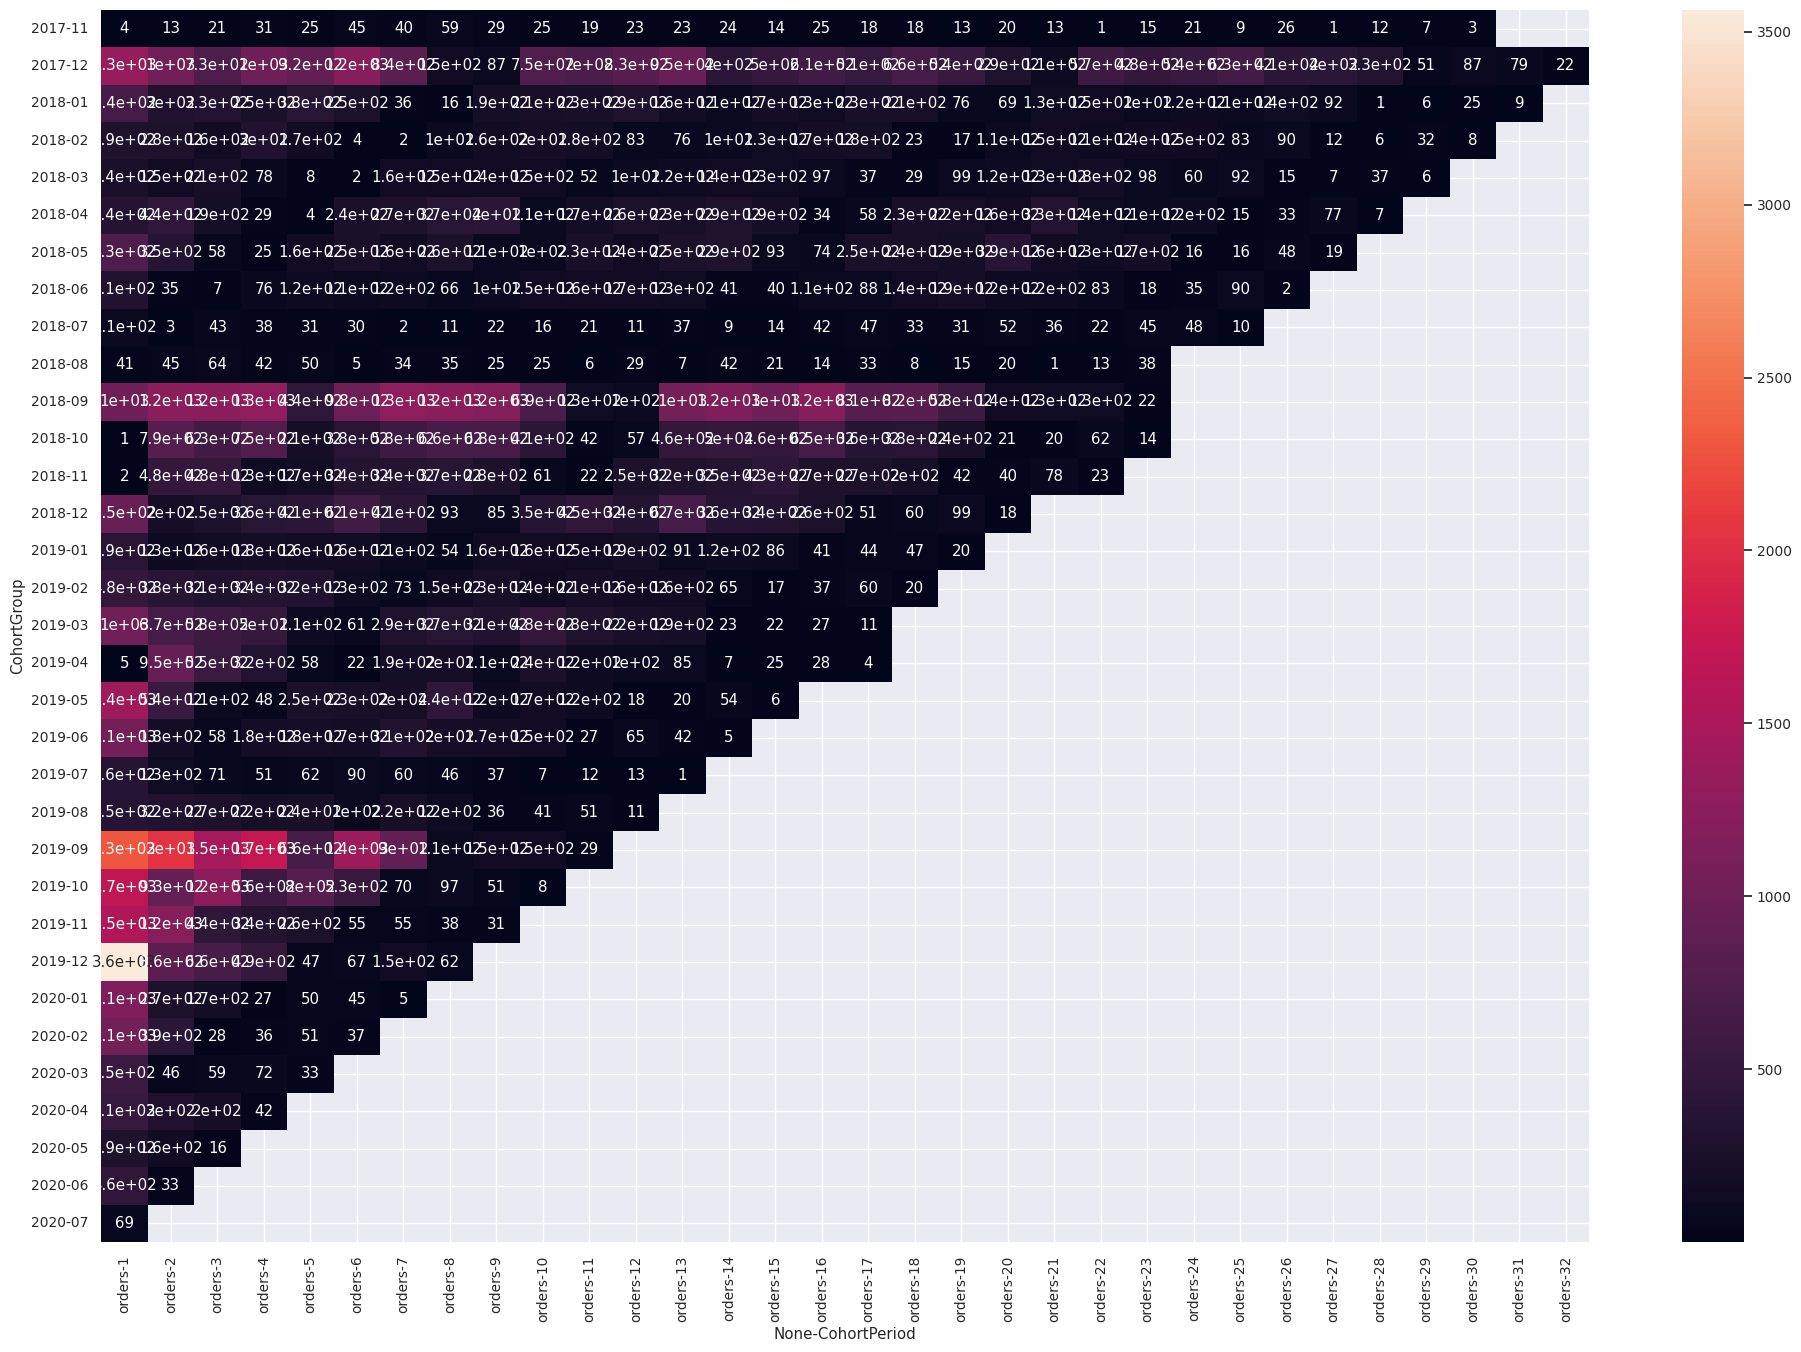

In [67]:
plt.figure(figsize=(24, 16))
sns.set(font_scale=0.9)
sns.heatmap(results, mask=results.isnull(), annot=True);

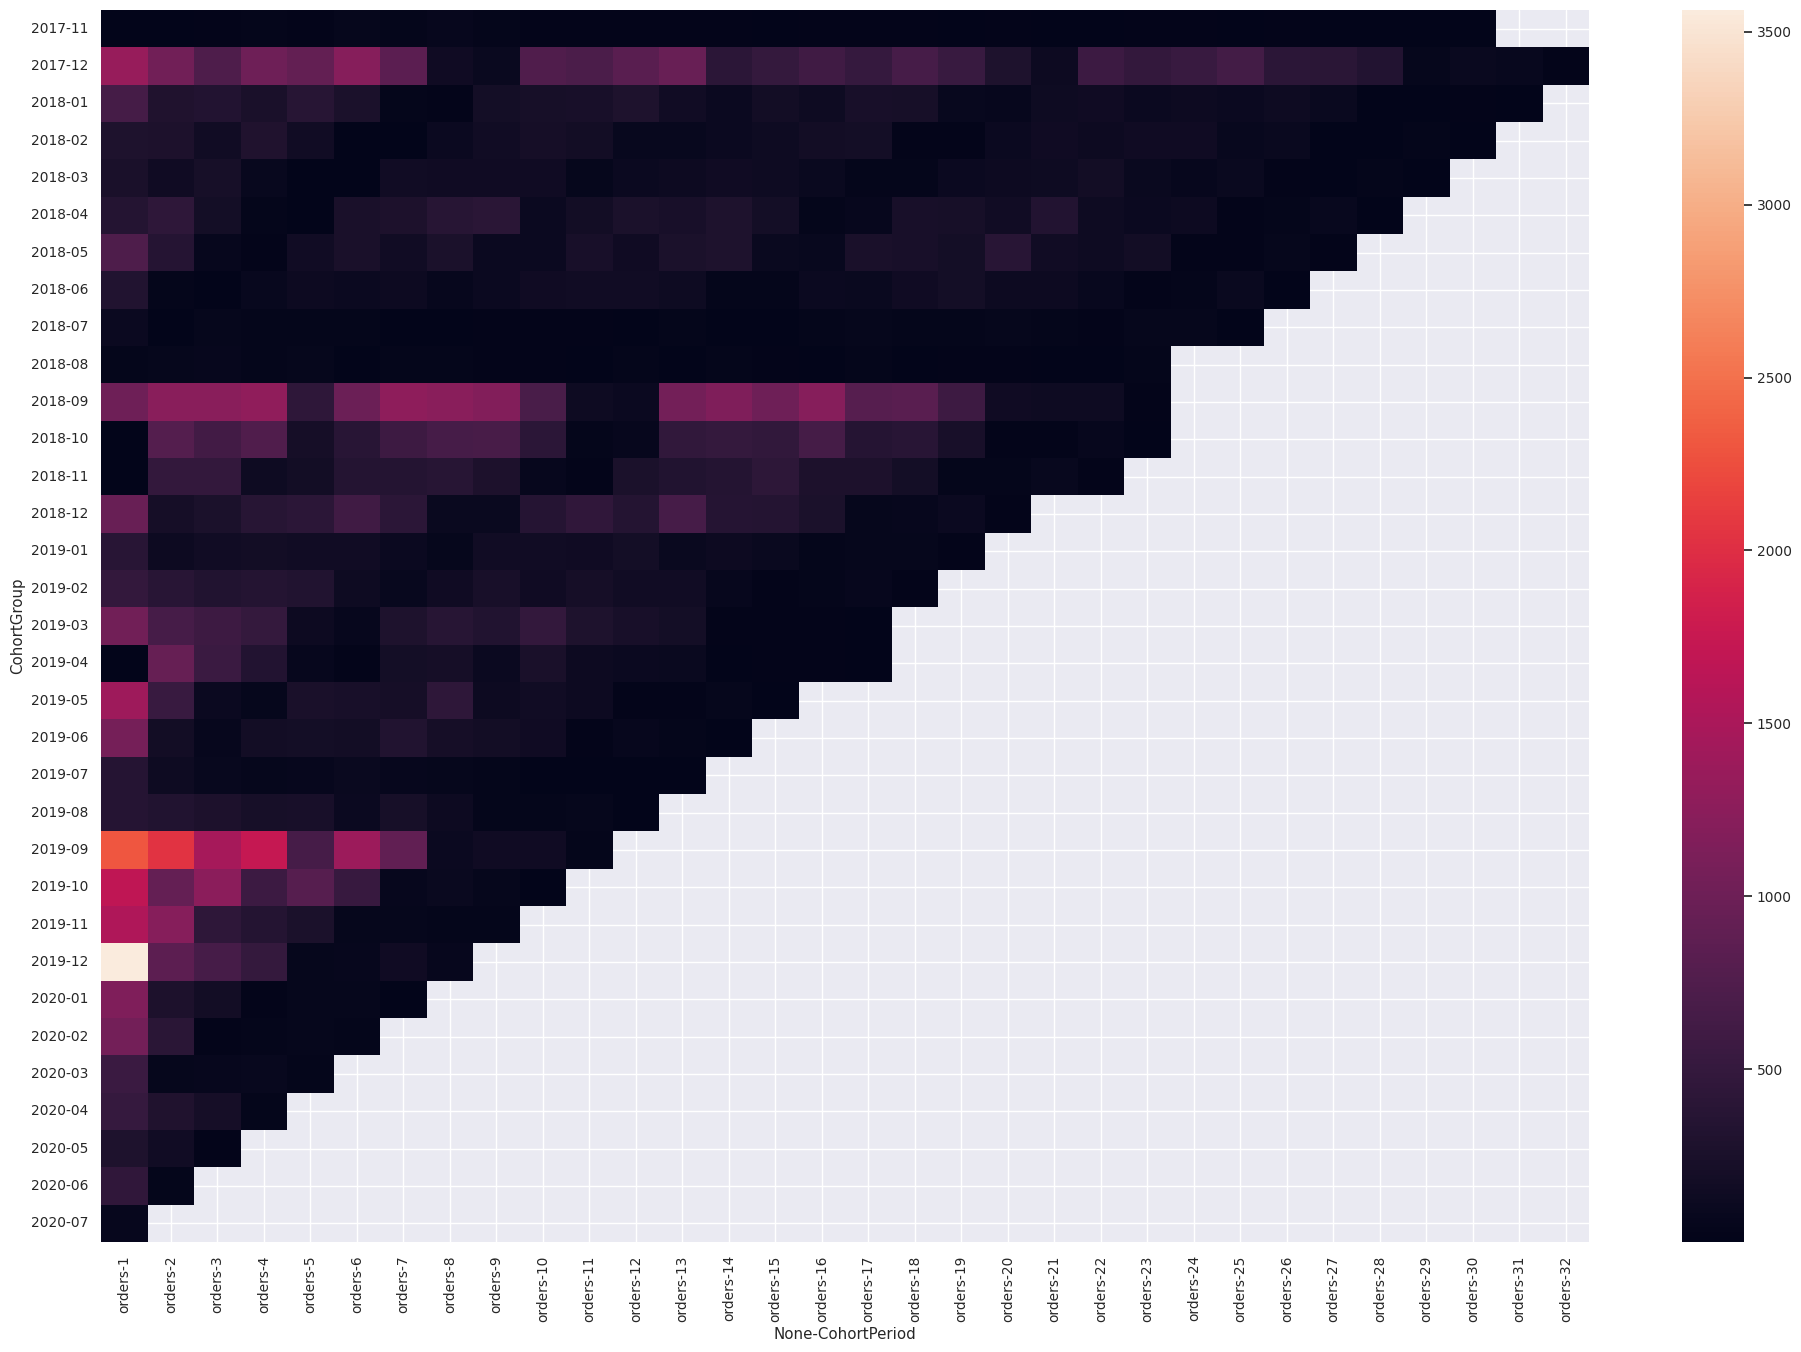

In [68]:
plt.figure(figsize=(24, 16))
sns.heatmap(results, mask=results.isnull(), annot=False);

In [69]:
results.T.max()

,0
CohortGroup,
2017-11,59.0
2017-12,1346.0
2018-01,643.0
2018-02,296.0
2018-03,240.0
2018-04,440.0
2018-05,727.0
2018-06,309.0
2018-07,110.0


In [70]:
results_relative = results.divide(results.T.max(), axis=0)
results_relative

orders                                                        \
CohortPeriod        1     2     3     4         5         6         7     8    
CohortGroup                                                                    
2017-11       6.78e-02  0.22  0.36  0.53  4.24e-01  7.63e-01  6.78e-01  1.00   
2017-12       1.00e+00  0.77  0.55  0.75  6.82e-01  8.97e-01  6.23e-01  0.11   
2018-01       1.00e+00  0.47  0.52  0.39  5.85e-01  3.93e-01  5.60e-02  0.02   
2018-02       9.86e-01  0.93  0.52  1.00  5.64e-01  1.35e-02  6.76e-03  0.34   
2018-03       1.00e+00  0.62  0.88  0.33  3.33e-02  8.33e-03  6.83e-01  0.61   
2018-04       7.64e-01  1.00  0.42  0.07  9.09e-03  5.43e-01  6.05e-01  0.85   
2018-05       1.00e+00  0.49  0.08  0.03  2.26e-01  3.41e-01  2.21e-01  0.36   
2018-06       1.00e+00  0.11  0.02  0.25  3.72e-01  3.56e-01  3.75e-01  0.21   
2018-07       1.00e+00  0.03  0.39  0.35  2.82e-01  2.73e-01  1.82e-02  0.10   
2018-08       6.41e-01  0.70  1.00  0.66  7.81e-01  7.81e-02  5.31e-01  0.55   
2018-09       7.82e-01  0.95  0.95  1.00  3.40e-01  7.58e-01  9.88e-01  0.96   
2018-10       1.27e-03  1.00  0.80  0.95  2.62e-01  4.82e-01  7.41e-01  0.84   
2018-11       4.15e-03  1.00  1.00  0.26  3.59e-01  6.95e-01  7.12e-01  0.77   
2018-12       1.00e+00  0.21  0.27  0.38  4.35e-01  6.40e-01  4.30e-01  0.10   
2019-01       1.00e+00  0.32  0.41  0.45  4.07e-01  4.25e-01  2.89e-01  0.14   
2019-02       1.00e+00  0.79  0.64  0.69  6.60e-01  2.64e-01  1.51e-01  0.30   
2019-03       1.00e+00  0.64  0.56  0.48  1.09e-01  5.87e-02  2.78e-01  0.36   
2019-04       5.29e-03  1.00  0.58  0.34  6.13e-02  2.33e-02  2.05e-01  0.22   
2019-05       1.00e+00  0.39  0.08  0.03  1.79e-01  1.67e-01  1.44e-01  0.32   
2019-06       1.00e+00  0.17  0.05  0.17  1.71e-01  1.62e-01  2.87e-01  0.18   
2019-07       1.00e+00  0.37  0.20  0.14  1.74e-01  2.53e-01  1.69e-01  0.13   
2019-08       1.00e+00  0.91  0.77  0.63  6.77e-01  2.97e-01  6.37e-01  0.35   
2019-09       1.00e+00  0.89  0.64  0.75  2.87e-01  6.01e-01  3.91e-01  0.05   
2019-10       1.00e+00  0.55  0.74  0.33  4.76e-01  3.13e-01  4.16e-02  0.06   
2019-11       1.00e+00  0.78  0.28  0.22  1.65e-01  3.57e-02  3.57e-02  0.02   
2019-12       1.00e+00  0.24  0.19  0.14  1.32e-02  1.88e-02  4.18e-02  0.02   
2020-01       1.00e+00  0.23  0.15  0.02  4.36e-02  3.92e-02  4.36e-03   NaN   
2020-02       1.00e+00  0.37  0.03  0.03  4.84e-02  3.51e-02       NaN   NaN   
2020-03       1.00e+00  0.08  0.11  0.13  6.02e-02       NaN       NaN   NaN   
2020-04       1.00e+00  0.60  0.40  0.08       NaN       NaN       NaN   NaN   
2020-05       1.00e+00  0.55  0.05   NaN       NaN       NaN       NaN   NaN   
2020-06       1.00e+00  0.07   NaN   NaN       NaN       NaN       NaN   NaN   
2020-07       1.00e+00   NaN   NaN   NaN       NaN       NaN       NaN   NaN   

                                                                              \
CohortPeriod    9         10    11    12        13        14        15    16   
CohortGroup                                                                    
2017-11       0.49  4.24e-01  0.32  0.39  3.90e-01  4.07e-01  2.37e-01  0.42   
2017-12       0.06  5.58e-01  0.52  0.62  7.06e-01  3.01e-01  3.72e-01  0.45   
2018-01       0.30  3.33e-01  0.36  0.46  2.57e-01  1.74e-01  2.63e-01  0.20   
2018-02       0.56  6.62e-01  0.59  0.28  2.57e-01  3.51e-01  4.46e-01  0.58   
2018-03       0.59  6.37e-01  0.22  0.43  4.79e-01  5.88e-01  5.54e-01  0.40   
2018-04       0.91  2.52e-01  0.40  0.59  5.30e-01  6.57e-01  4.36e-01  0.08   
2018-05       0.15  1.40e-01  0.32  0.20  3.48e-01  3.98e-01  1.28e-01  0.10   
2018-06       0.33  4.89e-01  0.53  0.54  4.21e-01  1.33e-01  1.29e-01  0.36   
2018-07       0.20  1.45e-01  0.19  0.10  3.36e-01  8.18e-02  1.27e-01  0.38   
2018-08       0.39  3.91e-01  0.09  0.45  1.09e-01  6.56e-01  3.28e-01  0.22   
2018-09       0.91  5.32e-01  0.10  0.08  8.11e-01  8.94e-01  7.81e-01  0.94   
2018-10       0

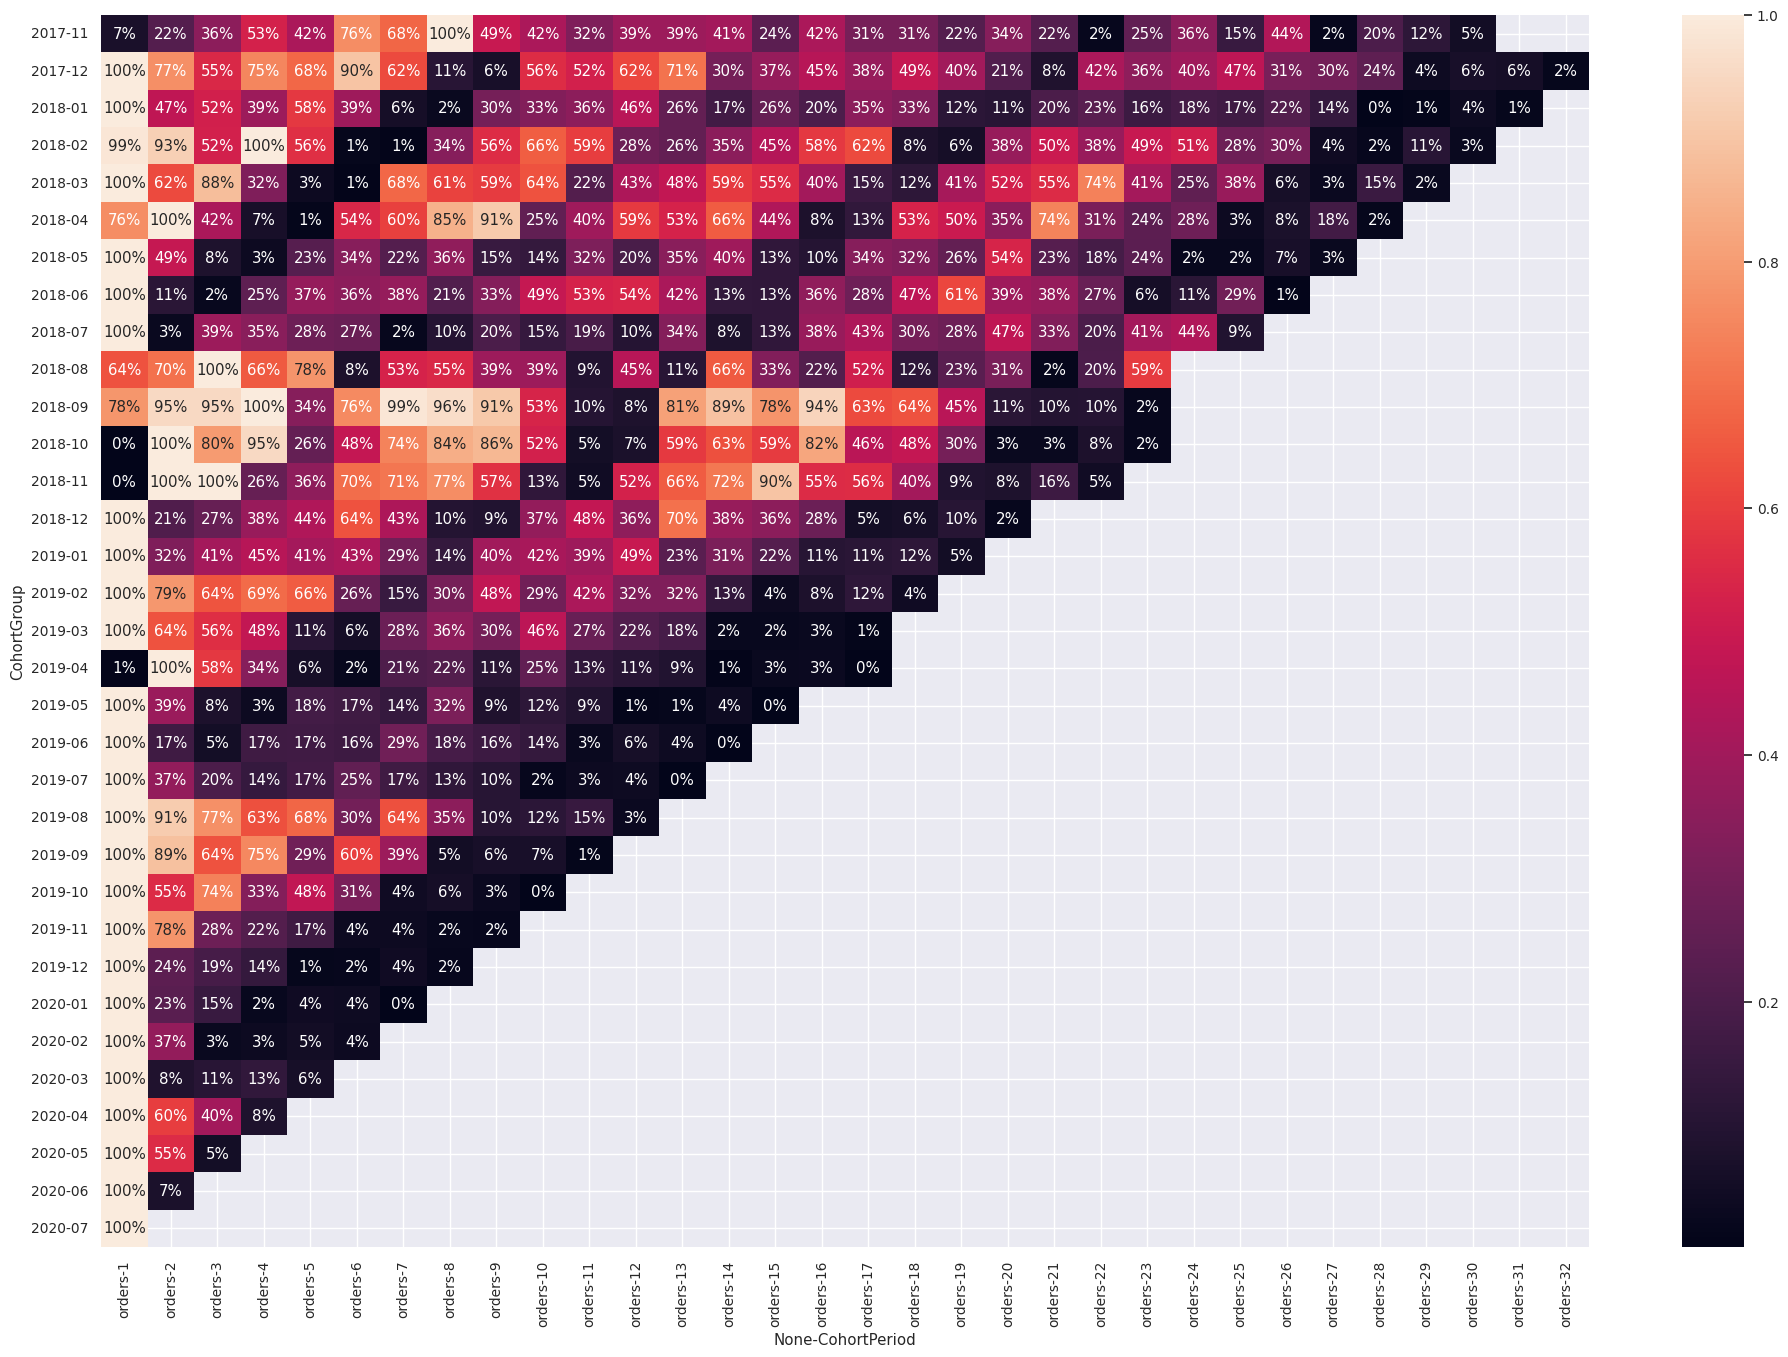

In [71]:
plt.figure(figsize=(24, 16))
sns.set(font_scale=0.9)
sns.heatmap(results_relative, mask=results_relative.isnull(), annot=True, fmt='.0%');